In [1]:
import random
import matplotlib.pyplot as plt
from matplotlib.patches import BoxStyle
import matplotlib.patches as patches
import numpy as np
import math
import csv
from datetime import date

In [2]:
def mescola(cg,nm):
    min = len(cg)
    h = min-1
    for k in range(0,min-1):
        rNum = random.randint(0,h)
        appN = nm[h]
        appC = cg[h]
        nm[h] = nm[rNum]
        cg[h] = cg[rNum]
        nm[rNum] = appN
        cg[rNum] = appC
        h -=1
    return cg,nm

# Scelta classe

## 1  4CSCA 
## 2  5ASCA 
## 3  3ASCA

In [3]:
c = 3

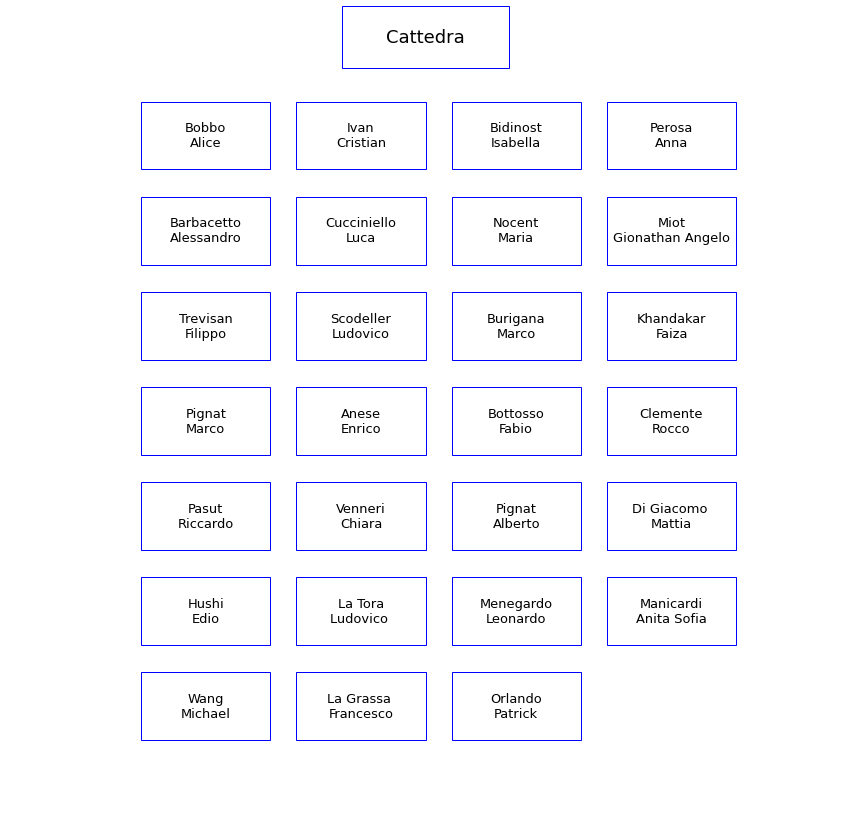

In [4]:
nome = []
cognome = []
if c==1:
    filecsv = 'testi/4csca.csv'
    classe = '4CSCA'
elif c==2:
    filecsv = 'testi/5asca.csv'
    classe ='5ASCA'
elif c==3:
    filecsv = 'testi/3asca.csv'
    classe = '3ASCA'
maxLnome = 0
larg = 10
lung = 12
with open(filecsv, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for riga in csv_reader:
        cognome.append(riga['cognome'])
        m = len(riga['cognome'])
        if m>maxLnome:
            maxLnome = m
        nome.append(riga['nome'])
        m = len(riga['nome'])
        if m>maxLnome:
            maxLnome = m
lBanco = 1
if maxLnome>=11:
    cMedio=1/11
    lBanco =1+ (maxLnome-10)*cMedio
cognome, nome = mescola(cognome,nome)
figura,spazio = plt.subplots(1,figsize=(15, 15))
spazio.set_xlim([0, larg])
spazio.set_ylim([0, lung])
plt.axis('off')
hf = 13
centroX = larg/2
lCattedra = 2
h = 0.9
spazio.text(centroX, lung-h/2, 'Cattedra', fontsize=18,horizontalalignment='center',
            verticalalignment='center')
cattedra = patches.Rectangle((centroX-lCattedra/2,lung-h),lCattedra,h,linewidth=1,edgecolor='b',facecolor='none')
spazio.add_patch(cattedra)
n = len(nome)
nrighe = 6
if n>24:
    nrighe = 7
nfile = int(n/nrighe) +1
totLbanchi = nfile*lBanco+(nfile-2)*(0.2*lBanco)
h = (larg-totLbanchi)/2
j = 0
for k in range (1,n+1):
    ly = lung - 2.4-2*j
    spazio.text(h+lBanco/2, ly+0.5, cognome[k-1]+'\n'+nome[k-1], fontsize=hf,horizontalalignment='center',
            verticalalignment='center')
    banco = patches.Rectangle((h,ly),lBanco,1,linewidth=1,edgecolor='b',facecolor='none')
    spazio.add_patch(banco)
    if k%nrighe == 0:
        h += 1.2*lBanco
        j = -0.7
    j +=0.7
#
oggi = str(date.today())
fileOggi = 'figure/'+classe+'_'+oggi+'.pdf'
plt.savefig(fileOggi)
plt.show()